In [1]:
%load_ext watermark

In [2]:
%watermark -a "Derek Lewis" -m -v -p torch,torchvision

Author: Derek Lewis

Python implementation: CPython
Python version       : 3.11.3
IPython version      : 8.12.0

torch      : 2.1.0.dev20230703
torchvision: 0.16.0.dev20230704

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 23.0.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



In [3]:
import torch
import torchvision

In [4]:
LR = 0.001
DOWNLOAD = True
DATA = 'datasets/cifar10/'
device = 'mps'

In [5]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(
        root=DATA,
        train=True,
        transform=transform,
        download=DOWNLOAD
)

train_loader = torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=128,
        
)

Files already downloaded and verified


In [6]:
model = torchvision.models.resnet50()
model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = LR, momentum=0.9)

In [7]:
%%time

loss_plot = []

for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    loss_plot.append(loss.item())
    print('batch_idx: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        batch_idx, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))

batch_idx: 0 [0/50000 (0%)]	Loss: 6.930595
batch_idx: 1 [128/50000 (0%)]	Loss: 6.704459
batch_idx: 2 [256/50000 (1%)]	Loss: 6.457102
batch_idx: 3 [384/50000 (1%)]	Loss: 6.170740
batch_idx: 4 [512/50000 (1%)]	Loss: 5.543808
batch_idx: 5 [640/50000 (1%)]	Loss: 4.903372
batch_idx: 6 [768/50000 (2%)]	Loss: 4.382314
batch_idx: 7 [896/50000 (2%)]	Loss: 3.759363
batch_idx: 8 [1024/50000 (2%)]	Loss: 3.089554
batch_idx: 9 [1152/50000 (2%)]	Loss: 2.799697
batch_idx: 10 [1280/50000 (3%)]	Loss: 2.594419
batch_idx: 11 [1408/50000 (3%)]	Loss: 2.474076
batch_idx: 12 [1536/50000 (3%)]	Loss: 2.560858
batch_idx: 13 [1664/50000 (3%)]	Loss: 2.456795
batch_idx: 14 [1792/50000 (4%)]	Loss: 2.283282
batch_idx: 15 [1920/50000 (4%)]	Loss: 2.418883
batch_idx: 16 [2048/50000 (4%)]	Loss: 2.357493
batch_idx: 17 [2176/50000 (4%)]	Loss: 2.423382
batch_idx: 18 [2304/50000 (5%)]	Loss: 2.341697
batch_idx: 19 [2432/50000 (5%)]	Loss: 2.374975
batch_idx: 20 [2560/50000 (5%)]	Loss: 2.317913
batch_idx: 21 [2688/50000 (5%)]	L

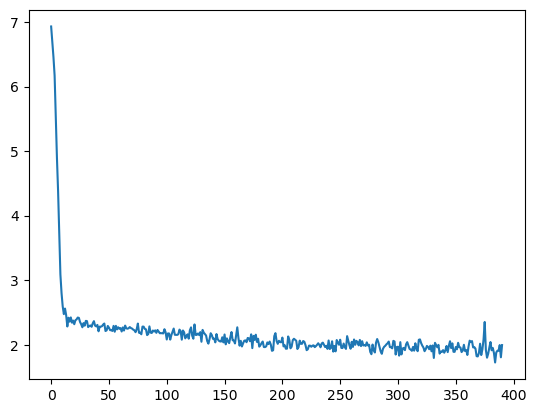

In [8]:
import matplotlib.pyplot as plt

X = range(len(loss_plot))
Y = loss_plot
plt.plot(X, Y)
plt.show()

In [9]:
torch.save({
     'model_state_dict': model.state_dict(),
     'optimizer_state_dict': optimizer.state_dict(),
     }, 'checkpoint.pth')

In [10]:
%%time

model.eval()

test_dataset = torchvision.datasets.CIFAR10(
        root=DATA,
        train=False,
        transform=transform,
        download=DOWNLOAD
)

test_loader = torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=128,
)

correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Files already downloaded and verified
Accuracy of the network on the 10000 test images: 30 %
CPU times: user 13.2 s, sys: 1min 1s, total: 1min 15s
Wall time: 3min 10s
